In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
hyp=dict(lr0= 0.01,
lrf= 0.01,
momentum= 0.937,
weight_decay= 0.0005,
warmup_epochs= 3.0,
warmup_momentum= 0.8,
warmup_bias_lr= 0.1,
box= 0.05,
cls= 0.5  ,# cls loss gain
cls_pw= 1.0  ,# cls BCELoss positive_weight
obj= 1.0  ,# obj loss gain (scale with pixels)
obj_pw= 1.0  ,# obj BCELoss positive_weight
iou_t= 0.20  ,# IoU training threshold
anchor_t= 4.0  ,# anchor-multiple threshold
fl_gamma= 0.0  ,# focal loss gamma (efficientDet default gamma=1.5)
hsv_h= 0.015  ,# image HSV-Hue augmentation (fraction)
hsv_s= 0.7  ,# image HSV-Saturation augmentation (fraction)
hsv_v= 0.4  ,# image HSV-Value augmentation (fraction)
degrees= 0.0  ,# image rotation (+/- deg)
translate= 0.1  ,# image translation (+/- fraction)
scale= 0.5  ,# image scale (+/- gain)
shear= 0.0  ,# image shear (+/- deg)
perspective= 0.0  ,# image perspective (+/- fraction), range 0-0.001
flipud= 0.0  ,# image flip up-down (probability)
fliplr= 0.5  ,# image flip left-right (probability)
mosaic= 1.0,
mixup= 0.0,
copy_paste= 0.0,
)

In [3]:
import sys
sys.path.append('yolov5')

In [11]:
from yolov5.utils.dataloaders import create_dataloader
train_loader, dataset = create_dataloader(path="/data2/chenlida/work/ml/pjf/yolo_data_6chan/train/images",
                                            imgsz=416,
                                            batch_size=128,
                                            stride=32,
                                            single_cls=False,
                                            hyp=hyp,
                                            augment=True,
                                            cache='ram',
                                            rect=False,
                                            rank=-1,
                                            workers=8,
                                            image_weights=False,
                                            quad=False,
                                            prefix='',
                                            shuffle=True,
                                            seed=0)

Scanning /data2/chenlida/work/ml/pjf/yolo_data_6chan/train/labels.cache... 27742 images, 1742 backgrounds, 0 corrupt: 100%|██████████| 27742/27742 [00:00<?, ?it/s]
Caching images (26.8GB ram): 100%|██████████| 27742/27742 [00:34<00:00, 813.69it/s] 


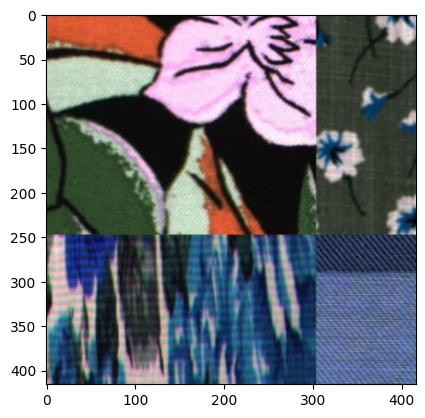

In [66]:
import matplotlib.pyplot as plt
plt.imshow(dataset.__getitem__(5436)[0].numpy()[::-1].transpose((1, 2, 0))[:,:,3:])


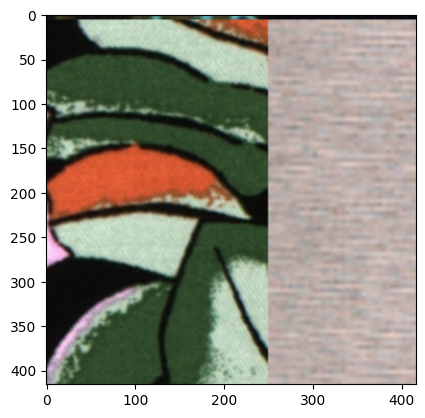

In [70]:
import matplotlib.pyplot as plt
plt.imshow(dataset.__getitem__(5436)[0].numpy()[::-1].transpose((1, 2, 0))[:,:,3:])

In [33]:
import cv2
import numpy as np
def translate_image_and_bbox(image, bbox, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx*cols], [0, 1, ty*rows]])
    image = cv2.warpAffine(image, M, (cols, rows))
    bbox=[[b[0]+tx,b[1]+ty,b[2],b[3],b[4]] for b in bbox]
    return image, bbox
i,b=translate_image_and_bbox(dataset.__getitem__(5435)[0].numpy()[::-1].transpose((1, 2, 0)),[],0.2,0.2)

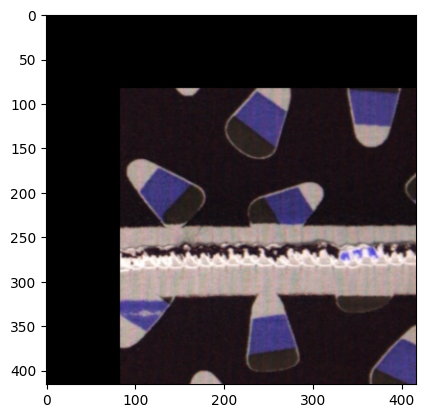

In [34]:
import matplotlib.pyplot as plt
plt.imshow(i[:,:,:3])

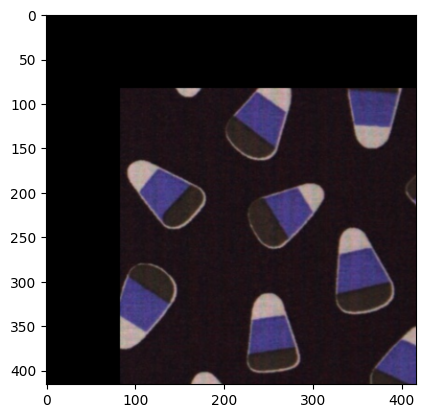

In [35]:
import matplotlib.pyplot as plt
plt.imshow(i[:,:,3:])

In [1]:
import torch
from yolov5.models.yolo import Model
ckpt = torch.load('yolov5/runs/train/exp86/weights/best.pt', map_location='cpu')

In [2]:
ckpt.keys()

dict_keys(['epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'opt', 'git', 'date'])

In [5]:
pa=ckpt['model'].float().state_dict()

In [6]:
model = Model('yolov5/models/myyolov5n.yaml', ch=6, nc=13, anchors=hyp.get('anchors'))


                 from  n    params  module                                  arguments                     
  0                -1  1         0  models.common.EmptyLayer                []                            
  1                 0  1         0  models.common.SubInput                  [0, 3]                        
  2                 0  1         0  models.common.SubInput                  [3, 6]                        
  3                 1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]              
  4                 2  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]              
  5                -2  1      4672  models.common.Conv                      [16, 32, 3, 2]                
  6                -2  1      4672  models.common.Conv                      [16, 32, 3, 2]                
  7                -2  1      4800  models.common.C3                        [32, 32, 1]                   
  8                -2  1      4800  

In [7]:
mpa=model.float().state_dict()

In [8]:
mpa.keys()

odict_keys(['model.3.conv.weight', 'model.3.bn.weight', 'model.3.bn.bias', 'model.3.bn.running_mean', 'model.3.bn.running_var', 'model.3.bn.num_batches_tracked', 'model.4.conv.weight', 'model.4.bn.weight', 'model.4.bn.bias', 'model.4.bn.running_mean', 'model.4.bn.running_var', 'model.4.bn.num_batches_tracked', 'model.5.conv.weight', 'model.5.bn.weight', 'model.5.bn.bias', 'model.5.bn.running_mean', 'model.5.bn.running_var', 'model.5.bn.num_batches_tracked', 'model.6.conv.weight', 'model.6.bn.weight', 'model.6.bn.bias', 'model.6.bn.running_mean', 'model.6.bn.running_var', 'model.6.bn.num_batches_tracked', 'model.7.cv1.conv.weight', 'model.7.cv1.bn.weight', 'model.7.cv1.bn.bias', 'model.7.cv1.bn.running_mean', 'model.7.cv1.bn.running_var', 'model.7.cv1.bn.num_batches_tracked', 'model.7.cv2.conv.weight', 'model.7.cv2.bn.weight', 'model.7.cv2.bn.bias', 'model.7.cv2.bn.running_mean', 'model.7.cv2.bn.running_var', 'model.7.cv2.bn.num_batches_tracked', 'model.7.cv3.conv.weight', 'model.7.cv3.

In [9]:
import numpy as np
for pn in mpa.keys():
    l=pn.split('.')
    layer=int(l[1])
    if layer in np.arange(3,9):
        old_name=l
        old_name[1]=str((layer+1)//2-2)
        old_name=".".join(old_name)
        mpa[pn]=pa[old_name]
    if layer in np.arange(10,14):
        old_name=l
        old_name[1]=str(layer//2-2)
        old_name=".".join(old_name)
        mpa[pn]=pa[old_name]
    if layer in np.arange(15,19):
        old_name=l
        old_name[1]=str((layer-1)//2-2)
        old_name=".".join(old_name)
        mpa[pn]=pa[old_name]
    if layer in np.arange(20,26):
        old_name=l
        old_name[1]=str((layer-2)//2-2)
        old_name=".".join(old_name)
        mpa[pn]=pa[old_name]
    if layer in np.arange(27,42):
        old_name=l
        old_name[1]=str(layer-17)
        old_name=".".join(old_name)
        mpa[pn]=pa[old_name]

In [36]:
# import numpy as np
# for pn in mpa.keys():
#     l=pn.split('.')
#     layer=int(l[1])
#     if layer in np.arange(3,13):
#         old_name=l
#         old_name[1]=str((layer+1)//2-2)
#         old_name=".".join(old_name)
#         mpa[pn]=pa[old_name]
#     if layer in np.arange(14,18):
#         old_name=l
#         old_name[1]=str(layer//2-2)
#         old_name=".".join(old_name)
#         mpa[pn]=pa[old_name]
#     if layer in np.arange(19,25):
#         old_name=l
#         old_name[1]=str((layer-1)//2-2)
#         old_name=".".join(old_name)
#         mpa[pn]=pa[old_name]
#     if layer in np.arange(26,40):
#         old_name=l
#         old_name[1]=str(layer-16)
#         old_name=".".join(old_name)
#         mpa[pn]=pa[old_name]

In [10]:
mpa

OrderedDict([('model.3.conv.weight',
              tensor([[[[-8.50220e-02, -1.47705e-01, -3.16772e-02, -2.45209e-02,  5.10254e-02,  5.76782e-02],
                        [-1.65527e-01, -1.17493e-01,  8.50220e-02, -2.02484e-02,  7.53784e-02,  1.62720e-01],
                        [-1.90063e-01, -5.18494e-02,  2.33887e-01,  1.69830e-02,  1.07666e-01,  2.18506e-01],
                        [-2.11426e-01, -1.89697e-01, -1.70044e-01, -6.02722e-02,  1.97021e-01,  1.69312e-01],
                        [-1.26343e-01, -1.08948e-01, -7.64771e-02,  1.94946e-01,  3.68408e-01,  1.50269e-01],
                        [-1.03088e-01, -5.71899e-02,  4.87976e-02,  1.52100e-01,  1.35010e-01,  1.16882e-01]],
              
                       [[-1.37451e-01, -1.45020e-01, -3.30505e-02, -6.37207e-02,  4.11606e-03,  1.54495e-03],
                        [-1.55762e-01, -1.39160e-02,  2.08008e-01, -2.05688e-02,  1.88904e-02,  6.79321e-02],
                        [-9.80225e-02,  1.26099e-01,  3.81348e-01, 

In [11]:
model.load_state_dict(mpa)

<All keys matched successfully>

In [25]:
list(mpa.keys())[-10:]

['model.40.m.0.cv2.bn.running_mean',
 'model.40.m.0.cv2.bn.running_var',
 'model.40.m.0.cv2.bn.num_batches_tracked',
 'model.41.anchors',
 'model.41.m.0.weight',
 'model.41.m.0.bias',
 'model.41.m.1.weight',
 'model.41.m.1.bias',
 'model.41.m.2.weight',
 'model.41.m.2.bias']

In [12]:
sv=torch.save(model.float(),'myyolov5n2.ptt')

In [59]:
model=torch.load('myyolov5n.ptt')

In [60]:
model

DetectionModel(
  (model): Sequential(
    (0): EmptyLayer()
    (1): SubInput()
    (2): SubInput()
    (3): Conv(
      (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (4): Conv(
      (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (5): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (6): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running

In [46]:
aa=torch.load('./myyolov5n.pt')
aa.state_dict()

OrderedDict([('model.3.conv.weight',
              tensor([[[[-3.93677e-03, -1.15967e-01, -5.77087e-02, -2.52838e-02,  2.51770e-02,  5.48706e-02],
                        [-1.50024e-01, -1.43311e-01,  9.37500e-02, -4.56238e-02,  1.63269e-02,  1.39404e-01],
                        [-2.08496e-01, -9.54437e-03,  2.54150e-01,  1.27792e-03,  2.90222e-02,  1.79321e-01],
                        [-1.65771e-01, -1.95312e-01, -2.44263e-01, -1.10657e-01,  1.98486e-01,  1.55151e-01],
                        [-7.14722e-02, -1.09924e-01, -1.60400e-01,  1.98975e-01,  3.94287e-01,  1.27563e-01],
                        [-5.63354e-02, -1.03836e-02,  2.77710e-02,  1.24329e-01,  6.11572e-02,  7.67822e-02]],
              
                       [[-6.42776e-03, -7.08618e-02, -2.08130e-02, -1.57471e-02,  2.76184e-02,  2.74963e-02],
                        [-9.68628e-02, -2.20032e-02,  2.17407e-01, -2.90222e-02, -4.51965e-02,  4.16260e-02],
                        [-6.49414e-02,  1.73462e-01,  4.01611e-01, 

In [1]:
import pandas as pd
df=pd.read_json('partA/Annotations/anno_train.json')

In [15]:
def get_defect_category(defect_name):
    if defect_name in ["浆斑", "油渍","污渍","水渍"]:
        return '0'
    elif defect_name in ["三丝"]:
        return '1'
    elif defect_name in ["断氨纶"]:
        return '2'
    elif defect_name in ["毛粒", "烧毛痕"]:
        return '3'
    elif defect_name in ["结头"]:
        return '4'
    elif defect_name in ["修痕", "磨痕"]:
        return '5'
    elif defect_name in [ "破洞"]:
        return '6'
    elif defect_name in ["纬缩", "轧痕", "死皱"]:
        return '7'
    elif defect_name in ["粗维", "松经", "粗经", "筘路", "纬纱不良", "吊经"]:
        return '8'
    elif defect_name in ["浪纹档", "稀密档","色差档"]:
        return '9'
    elif defect_name in ["断经"]:
        return '10'
    elif defect_name in ["双纬", "云织", "双经", "整经结"]:
        return '11'
    elif defect_name in [ "花板跳", "百脚", "星跳", "跳花", "跳纱"]:
        return '12'
    else:
        print(defect_name)
        assert 1==0
        return '其他'
df['defect_name2']=df['defect_name'].apply(get_defect_category)

In [16]:
df['defect_name2'].value_counts()

defect_name2
4     1528
8     1419
1     1037
0      634
7      565
2      546
12     440
9      324
11     311
6      305
10     243
3      224
5      152
Name: count, dtype: int64